In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2
import numpy as np

In [8]:
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:, 1:].values
Y = dataset.iloc[:, 0].values
labels = dataset.iloc[:, 0].values
dataset = pd.read_csv('test.csv')
X_test = dataset.iloc[:, 1:].values
y_test = dataset.iloc[:, 0].values

In [9]:
def get_rect_list(contours):
    rect_list = []
    temp = []
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        temp.append([x, 1 / h, y, w, h])

    temp.sort()
    last = -1
    for rect in temp:
        if rect[0] + rect[3] >= last and rect[-1] * rect[-2] >= 1000:
            last = rect[0] + rect[3]
            rect_list.append([rect[0], rect[2], rect[3], rect[4]])
    return rect_list

In [10]:
def normalize(img):

    diff = len(img[0]) - 28
    if diff == 0:
        # print(img)
        return img
    
    if diff > 0:

        right = (diff + 1) // 2
        left = (diff) // 2
        
        np.delete(img, np.s_[len(img[0]) - right : len(img[0])], axis = 1)
        np.delete(img, np.s_[0 : left], axis=1)
        return img

    diff *= -1

    left_zeros = np.zeros((28 , diff // 2), dtype=img.dtype)
    right_zeros = np.zeros((28, (diff + 1) // 2), dtype=img.dtype)

    img = np.concatenate((left_zeros, img, right_zeros), axis=1)
        
    # print (img)
    return img 

In [11]:
def flat(img):
    temp = []
    for i in range(28):
        for j in range(28):
            temp.append(img[j][i])
    
    return temp

In [12]:
table = {
0: 48,
1: 49,
2: 50,
3: 51,
4: 52,
5: 53,
6: 54,
7: 55,
8: 56,
9: 57,
10: 65,
11: 66,
12: 67,
13: 68,
14: 69,
15: 70,
16: 71,
17: 72,
18: 73,
19: 74,
20: 75,
21: 76,
22: 77,
23: 78,
24: 79,
25: 80,
26: 81,
27: 82,
28: 83,
29: 84,
30: 85,
31: 86,
32: 87,
33: 88,
34: 89,
35: 90,
36: 97,
37: 98,
38: 100,
39: 101,
40: 102,
41: 103,
42: 104,
43: 110,
44: 113,
45: 114,
46: 116
}

In [14]:
img_read = cv2.imread("char.png", cv2.IMREAD_GRAYSCALE)
img_gas = cv2.GaussianBlur (img_read, (3, 3), 3)
img_thresh2 = cv2.adaptiveThreshold(img_gas, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 181, 10)
img_thresh2 = ~img_thresh2


cv2.imshow("img",img_thresh2)
cv2.waitKey(0)
cv2.destroyAllWindows()


contours, hierarchy = cv2.findContours(img_thresh2,
  cv2.RETR_TREE,
  cv2.CHAIN_APPROX_SIMPLE)

rect_list = get_rect_list (contours)

for rect in rect_list:
  x = rect[0]
  y = rect[1]
  w = rect[2]
  h = rect[3]
  cv2.rectangle(img_read ,(x,y), (x+w,y+h), (255,0,0), 5)
  cv2.imshow("img_read", img_read)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  # cv2.rectangle(img_thresh2 ,(x,y), (x+w,y+h), (255,255,255), 5)

all = []
shit = []
final_pic=''
for rect in rect_list:
  x = rect[0]
  y = rect[1]
  w = rect[2]
  h = rect[3]
  roi = img_thresh2[y : y + h, x : x + w]
  
  desired_height = 28
  aspect_ratio = desired_height / roi.shape[0]
  desired_width = int(roi.shape[1] * aspect_ratio)
  dim = ( desired_width, desired_height) 

  
  resized_cropped_region = cv2.resize(roi, dsize=dim, interpolation=cv2.INTER_AREA)
  normal_pic = normalize (resized_cropped_region)
  temp = flat(normal_pic)
  # cv2.imshow("img_read", normal_pic)
  # cv2.waitKey (0)
  # cv2.destroyAllWindows()
  final_pic = np.array(temp)
  shit.append (temp)
  all.append(final_pic)
# shit = all
# all = np.array(all)

In [15]:
X = X.reshape(-1, 28, 28)
for i in range (112799):
    X[i] = np.transpose(X[i], axes=None)

In [16]:
X = X/255
X = X.reshape(-1, 28, 28, 1)
X_test = X_test/255
X_test = X_test.reshape(-1, 28, 28, 1)

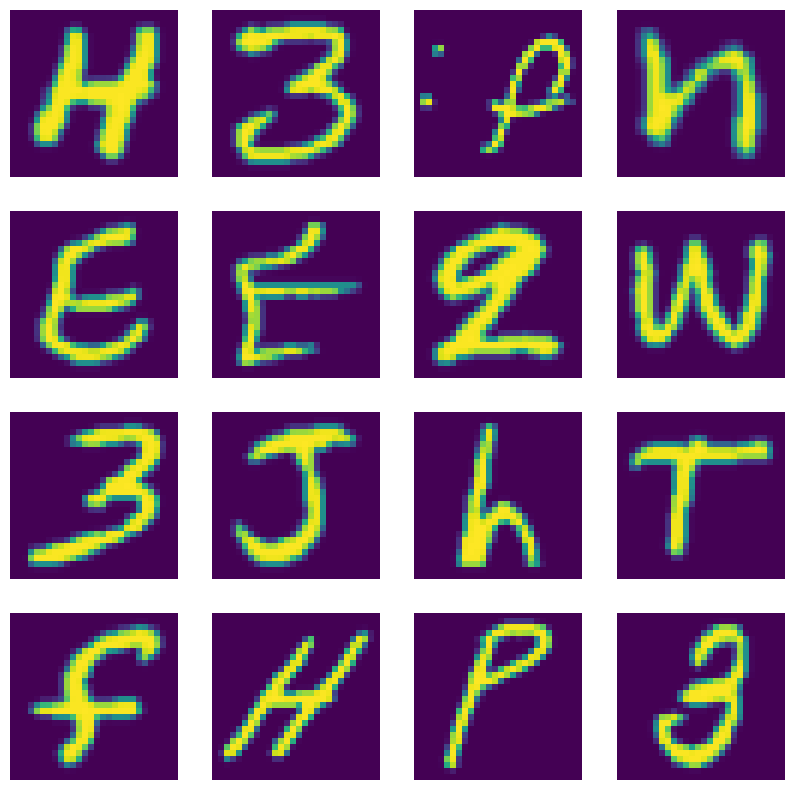

In [17]:
# X = X.reshape(-1, 28, 28, 1)
plt.figure(figsize=(10,10))
for i in range (16):
    plt.subplot(4, 4, i+1)
    plt.axis('off')
    plt.imshow(X[i + 16])
plt.show()

In [18]:
input_shape = X[0].shape

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer


generator = keras.preprocessing.image.ImageDataGenerator(

    rotation_range=10,
    width_shift_range=0.10,
    height_shift_range=0.10,
    
)

In [20]:
model = keras.Sequential([

    # InputLayer(input_shape=input_shape),
        

    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape), 
    Conv2D(32, (3, 3), activation='relu'), 
    MaxPooling2D((2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2)), 

    Flatten(), 
    Dropout(0.5),

    # BatchNormalization(renorm=True),
    Dense(units=512,activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(units=512,activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(units=256,activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(units=47, activation='softmax'),

])

In [22]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, Y, stratify=Y, train_size=0.75)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    generator.flow(X_train,y_train),
    validation_data=generator.flow(X_valid,y_valid),
    batch_size=32,
    epochs=50,
    callbacks=[early_stopping],
    verbose=0
)

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [ ]:
y_pred = model.predict(X_test)

In [25]:
def maxin (lis):

    maxim = -1
    ind = -1
    for i in range(len(lis)):
        if maxim == -1 or lis[i] > maxim:
            maxim = lis[i]
            ind = i
    return ind

In [ ]:
from sklearn.metrics import accuracy_score

temp = []
for i in y_pred:
    temp.append(maxin(i))
    
for i in range(len(temp)):
    if y_test[i] != temp[i]:
        print(chr(table[y_test[i]]), chr(table[temp[i]]), end = " ")
        print()
ac = accuracy_score(y_test, temp)
print(ac)

In [ ]:
import pickle
pickle.dump(model, open('shit.pkl', 'wb'))